In [1]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#这个表是直接从test_multipled里读出来的
dic={'spin':[0.5,0.5,0.5,0.5,0.5],
'e':[0.1,0.5,0.6,0.8,0.9],
'p':[5,6,10,20,40],
'a_d2':[4.8,4.4,3.16,1.8,0.9]}

In [3]:
M=2e5
spin=0.5
e=0
p=5.1
d2=0.1
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,e,p,0,d2,0)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [4]:
avgomgsec=circfreq_sec_fromtrace(t,phi,M)

In [5]:
def fun(x):
    spin=x
    omgsec=circfreq_sec_fromrma(p,M,spin)
    print('e=%f, p=%f, M=%f, spin=%.10f, omg=%.10f, aim=%.10f'%(e,p,M,spin,omgsec,avgomgsec))
    return (omgsec-avgomgsec)/avgomgsec


In [3]:
from scipy.optimize import root,fsolve
(myspin)=fsolve(fun,spin)
myM=M

NameError: name 'fun' is not defined

In [7]:
filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(myM,myspin,e,p,0,0,0)
PHI=0
THETA=np.pi/4
kerrwave=getwave(filenamekerr,THETA,PHI)

In [8]:
krzwave=getwave(filename,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(98000, 100000)

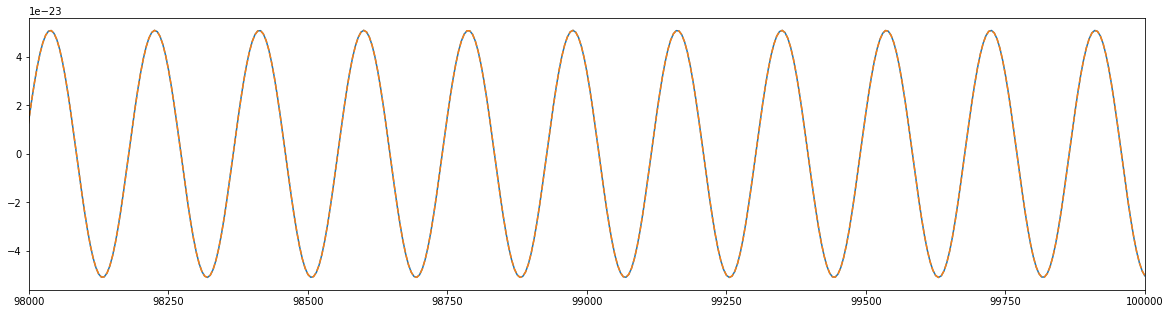

In [9]:
plt.figure(figsize=[20,5])
plt.plot(krzwave[0],krzwave[1])
plt.plot(kerrwave[0],kerrwave[1],'--')
plt.xlim(98000,100000)

In [4]:
spinl=[]
Ml=[]
para=[0.5,0.5,0.5,0.8,0.2]
pare=[0.1,0.5,0.6,0.6,0.6]
parp=[5,6,10,10,10]

for ind_par in np.arange(5):
    M=2e5
    spin=para[ind_par]
    e=pare[ind_par]
    p=parp[ind_par]
    i_d=1
    dlist=[]
    Mlist=[]
    spinlist=[]

    for d1 in np.arange(-0.2,0.6,0.1):
        filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d%d_%.6f.dat'%(M,spin,e,p,i_d,d1)
        index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)

        if np.abs(e-0.0)>1e-8:
            avgomgsec=getfreq_sec_frommaxi(t,r,phi,M)
            print(avgomgsec)
            avgomgr=avgomgsec[0]
            avgomgphi=avgomgsec[1]

            def fun(x):
                #print('called')
                M=x[0]
                spin=x[1]
                #print('e=%f, p=%f, M=%f, spin=%f, aimomgr=%f, aimomgphi=%f'%(e,p,M,spin,avgomgr,avgomgphi))

                omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)
                avgomgsec=np.array([avgomgr,avgomgphi])
                omgsec=np.array([omgr,omgphi])
                return (omgsec-avgomgsec)/avgomgsec


            from scipy.optimize import root,fsolve
            (myM,myspin)=fsolve(fun,[M,spin])

            getfreq_sec_fromepma(e,p,myM,myspin)
        else:
            avgomgsec=circfreq_sec_fromtrace(t,phi,M)
            def circfun(x):
                spin=x
                omgsec=circfreq_sec_fromrma(p,M,spin)
                print('e=%f, p=%f, M=%f, spin=%.10f, omg=%.10f, aim=%.10f'%(e,p,M,spin,omgsec,avgomgsec))
                return (omgsec-avgomgsec)/avgomgsec
            (myspin)=fsolve(fun,spin)
            myspin=myspin[0]
            myM=M
            circfreq_sec_fromrma(p,myM,myspin)
        dlist.append(d1)
        spinlist.append(myspin)
        Mlist.append(myM)
        for i in range(len(dlist)):
            print([dlist[i],spinlist[i],Mlist[i]])

    spinl.append(spinlist)
    Ml.append(Mlist)

[ 0.02179742  0.08915095]
[-0.20000000000000001, 0.3961994905626367, 198082.49130462675]
[ 0.02673884  0.08778742]
[-0.20000000000000001, 0.3961994905626367, 198082.49130462675]
[-0.10000000000000001, 0.44688705469794959, 199010.46497266061]
[ 0.03072327  0.08667884]
[-0.20000000000000001, 0.3961994905626367, 198082.49130462675]
[-0.10000000000000001, 0.44688705469794959, 199010.46497266061]
[0.0, 0.50000200827101848, 199999.79850960217]
[ 0.03414435  0.08566196]
[-0.20000000000000001, 0.3961994905626367, 198082.49130462675]
[-0.10000000000000001, 0.44688705469794959, 199010.46497266061]
[0.0, 0.50000200827101848, 199999.79850960217]
[0.10000000000000003, 0.55556443037278069, 201018.36540189461]
[ 0.03717528  0.0846864 ]
[-0.20000000000000001, 0.3961994905626367, 198082.49130462675]
[-0.10000000000000001, 0.44688705469794959, 199010.46497266061]
[0.0, 0.50000200827101848, 199999.79850960217]
[0.10000000000000003, 0.55556443037278069, 201018.36540189461]
[0.20000000000000001, 0.61376489

[ 0.01377121  0.01752357]
[-0.20000000000000001, 0.70826305236806197, 199700.13001279693]
[-0.10000000000000001, 0.75364885426415484, 199852.41554750511]
[0.0, 0.79999508609015901, 200000.91413217082]
[0.10000000000000003, 0.84734531106121203, 200145.7405501747]
[0.20000000000000001, 0.8957471063139637, 200286.95448495483]
[0.29999999999999999, 0.94525198478153494, 200424.59936392854]
[0.40000000000000008, 0.99592066424843673, 200558.29320079324]
[ 0.01381948  0.01744132]


C:\Users\HP\Documents\GitHub\KRZwave\KRZmetric.py:343: RuntimeWarning: invalid value encountered in sqrt
  r0 = 1 + sqrt(1 - sqspin);
D:\ProgramFiles\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
D:\ProgramFiles\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[-0.20000000000000001, 0.70826305236806197, 199700.13001279693]
[-0.10000000000000001, 0.75364885426415484, 199852.41554750511]
[0.0, 0.79999508609015901, 200000.91413217082]
[0.10000000000000003, 0.84734531106121203, 200145.7405501747]
[0.20000000000000001, 0.8957471063139637, 200286.95448495483]
[0.29999999999999999, 0.94525198478153494, 200424.59936392854]
[0.40000000000000008, 0.99592066424843673, 200558.29320079324]
[0.5, 0.80000000000000004, 200000.0]
[ 0.01238532  0.0194351 ]
[-0.20000000000000001, 0.074499324216156348, 199348.74344905285]
[ 0.01249783  0.01923244]
[-0.20000000000000001, 0.074499324216156348, 199348.74344905285]
[-0.10000000000000001, 0.13635617805136613, 199675.52329810642]
[ 0.01260736  0.01903711]
[-0.20000000000000001, 0.074499324216156348, 199348.74344905285]
[-0.10000000000000001, 0.13635617805136613, 199675.52329810642]
[0.0, 0.2000018756892713, 199999.82037180892]
[ 0.01271416  0.01884843]
[-0.20000000000000001, 0.074499324216156348, 199348.74344905285]


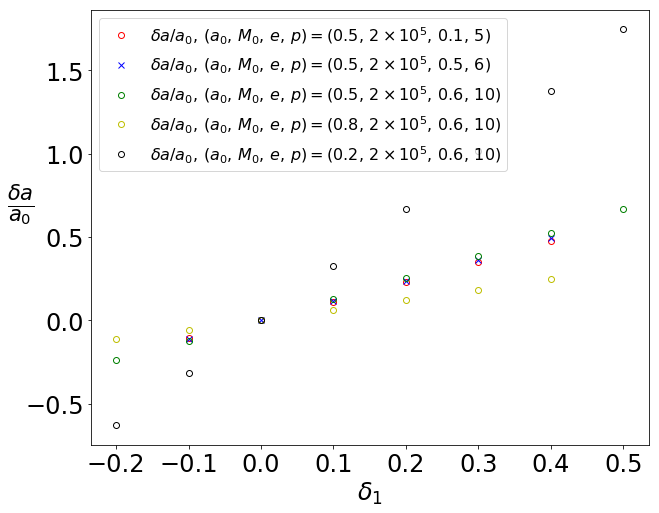

In [5]:
plt.figure(figsize=[10,8])
#plt.plot(np.arange(-0.2,0.6,0.01),0.052*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.012*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.025*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.015*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.007*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),np.zeros([80]),'y--')
plt.plot(dlist[1:7],(np.array(spinl[0][1:7])-0.5)/0.5,'ro',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 5)$')
#plt.plot(dlist[1:7],(np.array(Ml[0][1:7])-2e5)/2e5,'r*',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 5)$')
plt.plot(dlist[1:7],(np.array(spinl[1][1:7])-0.5)/0.5,'bx',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.5,\, 6)$')
#plt.plot(dlist[1:7],(np.array(Ml[1][1:7])-2e5)/2e5,'b+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.5,\, 6)$')
plt.plot(dlist,(np.array(spinl[2])-0.5)/0.5,'go',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.plot(dlist,(np.array(Ml[2])-2e5)/2e5,'gx',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.plot(dlist,(np.array(spinl5)-0.5)/0.5,'ko',markerfacecolor='none',label='$( e,\, p)=( 0.8,\, 20)$')
#plt.plot(dlist,(np.array(Ml5)-2e5)/2e5,'^',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.8,\, 20)$')
#plt.plot(dlist,(np.array(spinl6)-0.5)/0.5,'o',markeredgecolor='violet',markerfacecolor='none',label='$ ( e,\, p)=( 0.9,\, 40)$')
#plt.plot(dlist,(np.array(Ml6)-2e5)/2e5,'^',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.9,\, 40)$')
#plt.plot(dlist,(np.array(spinl[1])-0.5)/0.5,'bo',markerfacecolor='none',label='$( e,\, p)=( 0.05,\, 5)$')
#plt.plot(dlist,(np.array(Ml[1])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.05,\, 5)$')
#plt.plot(dlist,(np.array(spinl[2])-0.5)/0.5,'bo',markerfacecolor='none',label='$( e,\, p)=( 0.05,\, 4)$')
#plt.plot(dlist,(np.array(Ml[2])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.05,\, 4)$')
#plt.plot(dlist,(np.array(spinl[3])-0.5)/0.5,'yo',markerfacecolor='none',label='$( e,\, p)=( 0.1,\, 6)$')
#plt.plot(dlist,(np.array(Ml[3])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 6)$')


plt.plot(dlist[0:7],(np.array(spinl[3][0:7])-0.8)/0.8,'yo',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.8,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.plot(dlist[0:7],(np.array(Ml[3][0:7])-2e5)/2e5,'y+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.8,\, 2\\times10^5,\, 0.6,\, 10)$')
plt.plot(dlist,(np.array(spinl[4])-0.2)/0.2,'ko',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.2,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.plot(dlist,(np.array(Ml[4])-2e5)/2e5,'k^',markerfacecolor='none',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.2,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.text(0.3,-0.2,'$a_0=0.5, \, M_0=2\\times 10^5$',fontsize=20)
plt.xlabel('$\\delta _%d$'%i_d,fontsize=24)
plt.ylabel('$\\frac{\\delta a}{a_0}$',fontsize=30,rotation=0)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.ylim(-0.02,0.02)
plt.legend(fontsize=16)
plt.savefig('d%d_spin_linear_.pdf'%i_d)

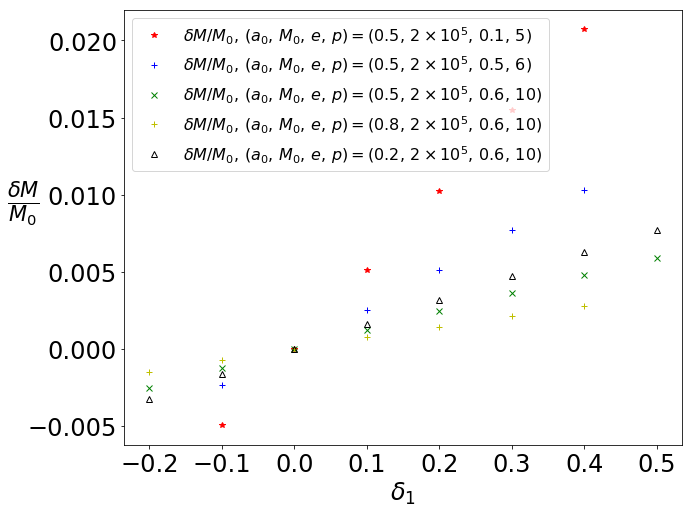

In [6]:
plt.figure(figsize=[10,8])
#plt.plot(np.arange(-0.2,0.6,0.01),0.052*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.012*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.025*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.015*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.007*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),np.zeros([80]),'y--')
#plt.plot(dlist[1:7],(np.array(spinl[0][1:7])-0.5)/0.5,'ro',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 5)$')
plt.plot(dlist[1:7],(np.array(Ml[0][1:7])-2e5)/2e5,'r*',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 5)$')
#plt.plot(dlist[1:7],(np.array(spinl[1][1:7])-0.5)/0.5,'bx',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.5,\, 6)$')
plt.plot(dlist[1:7],(np.array(Ml[1][1:7])-2e5)/2e5,'b+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.5,\, 6)$')
#plt.plot(dlist,(np.array(spinl[2])-0.5)/0.5,'go',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.6,\, 10)$')
plt.plot(dlist,(np.array(Ml[2])-2e5)/2e5,'gx',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.plot(dlist,(np.array(spinl5)-0.5)/0.5,'ko',markerfacecolor='none',label='$( e,\, p)=( 0.8,\, 20)$')
#plt.plot(dlist,(np.array(Ml5)-2e5)/2e5,'^',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.8,\, 20)$')
#plt.plot(dlist,(np.array(spinl6)-0.5)/0.5,'o',markeredgecolor='violet',markerfacecolor='none',label='$ ( e,\, p)=( 0.9,\, 40)$')
#plt.plot(dlist,(np.array(Ml6)-2e5)/2e5,'^',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.9,\, 40)$')
#plt.plot(dlist,(np.array(spinl[1])-0.5)/0.5,'bo',markerfacecolor='none',label='$( e,\, p)=( 0.05,\, 5)$')
#plt.plot(dlist,(np.array(Ml[1])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.05,\, 5)$')
#plt.plot(dlist,(np.array(spinl[2])-0.5)/0.5,'bo',markerfacecolor='none',label='$( e,\, p)=( 0.05,\, 4)$')
#plt.plot(dlist,(np.array(Ml[2])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.05,\, 4)$')
#plt.plot(dlist,(np.array(spinl[3])-0.5)/0.5,'yo',markerfacecolor='none',label='$( e,\, p)=( 0.1,\, 6)$')
#plt.plot(dlist,(np.array(Ml[3])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 6)$')


#plt.plot(dlist[0:7],(np.array(spinl[3][0:7])-0.8)/0.8,'yo',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.8,\, 2\\times10^5,\, 0.6,\, 10)$')
plt.plot(dlist[0:7],(np.array(Ml[3][0:7])-2e5)/2e5,'y+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.8,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.plot(dlist,(np.array(spinl[4])-0.2)/0.2,'ko',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.2,\, 2\\times10^5,\, 0.6,\, 10)$')
plt.plot(dlist,(np.array(Ml[4])-2e5)/2e5,'k^',markerfacecolor='none',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.2,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.text(0.3,-0.2,'$a_0=0.5, \, M_0=2\\times 10^5$',fontsize=20)
plt.xlabel('$\\delta _%d$'%i_d,fontsize=24)
plt.ylabel('$\\frac{\\delta M}{M_0}$',fontsize=30,rotation=0)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.ylim(-0.02,0.02)
plt.legend(fontsize=16)
plt.savefig('d%d_M_linear_.pdf'%i_d)

In [53]:
import pickle
pickle.dump({'a':spinl,'M':Ml},open('d2_spinM.p','wb'))###以后再用就pickle载入这两个了

In [114]:

pickle.dump({'a':spinl,'M':Ml},open('d1_spinM.p','wb'))

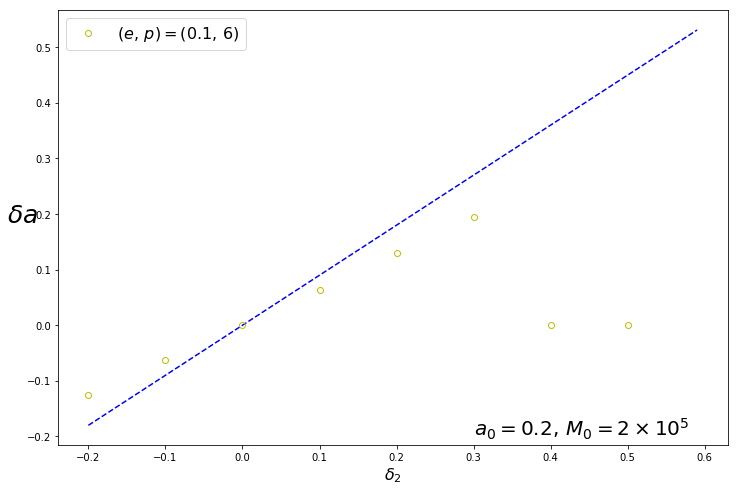

In [128]:
plt.figure(figsize=[12,8])
#plt.plot(np.arange(-0.2,0.6,0.01),1.58*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),2.2*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),2.4*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.9*np.arange(-0.2,0.6,0.01),'b--')
plt.plot(np.arange(-0.2,0.6,0.01),0.9*np.arange(-0.2,0.6,0.01),'b--')

plt.plot(dlist,(np.array(spinlist)-spin),'yo',markerfacecolor='none',label='$( e,\, p)=( 0.1,\, 6)$')
#plt.plot(dlist,(np.array(Ml[3])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 6)$')
plt.text(0.3,-0.2,'$a_0=0.2, \, M_0=2\\times 10^5$',fontsize=20)
plt.xlabel('$\\delta _2$',fontsize=16)
plt.ylabel('${\\delta a}$',fontsize=25,rotation=0)
plt.legend(fontsize=16)

In [129]:
#有点乱，e<0.05的时候就不清楚了，p<4的时候就根本解不出了（算出来的轨道其实也是错的，很多r的范围不对），但是p这么小的EMRI应该也不重要吧
#那我们将这样一个故事：观测到e=0.1,p=6的波形时，哪些参数（spin,d）的黑洞是可以区分出来的

In [130]:
dic['a_d2'].append(np.polyfit(dlist[0:6],spinlist[0:6],1)[0])
dic['e'].append(e)
dic['p'].append(p)
dic['spin'].append(spin)

In [131]:
dic

{'a_d2': [4.8,
  4.4,
  3.16,
  1.8,
  0.9,
  1.4033296211814135,
  1.3307982049546347,
  1.1552028677939052,
  0.90408605787875462,
  1.1037200453937124,
  0.97252405126681296,
  0.8023399513523094,
  0.64198434039481311],
 'e': [0.1, 0.5, 0.6, 0.8, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 'p': [5, 6, 10, 20, 40, 6, 6, 6, 6, 6, 6, 6, 6],
 'spin': [0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.3, 0.4, 0.5, 0.5, 0.6, 0.7, 0.8]}

In [91]:
#d2=0.5,spin=0.5,e=0.1,p=6这个有点不对，看看是不是能重合的

In [137]:
dic['spin'][5:8]+dic['spin'][9:]

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [124]:
Mlist[1:3]+Mlist[4:5]

[200358.06368599064, 199999.7437928158, 199173.52953427899]

In [97]:
THETA=np.pi/4; PHI=0
krzwave=getwave(filename,THETA,PHI)

In [96]:
filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(198953.64160146093,0.90930628903764599,e,p,0,0,0)
kerrwave=getwave(filenamekerr,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(2000, 4000)

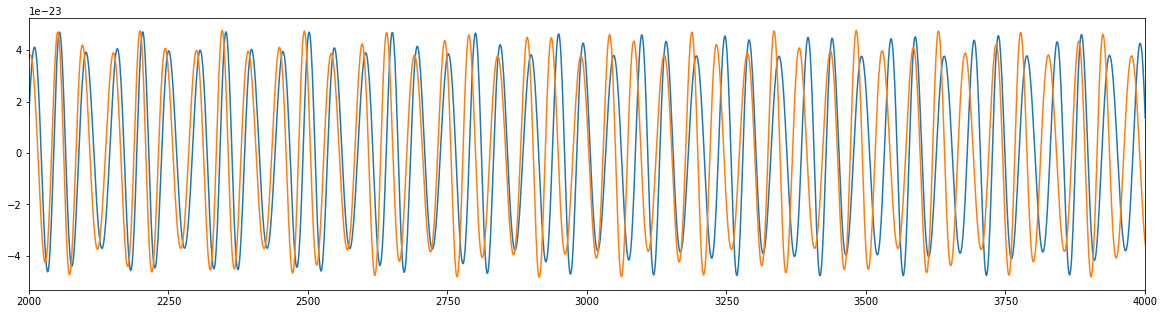

In [152]:
plt.figure(figsize=[20,5])
plt.plot(kerrwave[0],kerrwave[1])
plt.plot(krzwave[0],krzwave[1])
plt.xlim(2000,4000)

In [102]:
bracket(kerrwave[1],krzwave[1],1)/np.sqrt( bracket(kerrwave[1],kerrwave[1],1)*bracket(krzwave[1],krzwave[1],1) )

0.023334371467249246

In [138]:
#取出需要用的
newdic={}

In [139]:
for key in dic.keys():
    newdic[key]=dic[key][5:8]+dic[key][9:]

In [140]:
newdic

{'a_d2': [1.4033296211814135,
  1.3307982049546347,
  1.1552028677939052,
  1.1037200453937124,
  0.97252405126681296,
  0.8023399513523094,
  0.64198434039481311],
 'e': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 'p': [6, 6, 6, 6, 6, 6, 6],
 'spin': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}

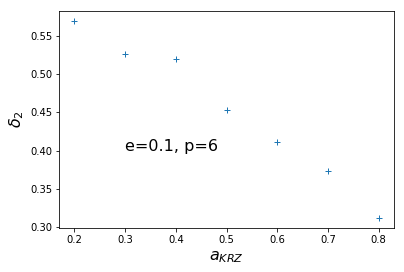

In [148]:
plt.plot(newdic['spin'],(1-np.array(newdic['spin']))/np.array(newdic['a_d2']) ,'+' )
plt.xlabel('$a_{KRZ}$',fontsize=16)
plt.ylabel('$\\delta_2$',fontsize=16)
plt.text(0.3,0.4,'e=0.1, p=6',fontsize=16)
plt.savefig('limit_d2_e0.1_p6.png',dpi=600)

In [153]:
spinl

[[0.32063429645546621,
  0.41246919188803216,
  0.49999999992644673,
  0.5830770489070688,
  0.66156807404299511,
  0.73535887744745654,
  0.80435378900066579,
  0.8684759260249979],
 [0.5,
  0.38439605141342914,
  0.50000007628142573,
  0.61782239996863741,
  0.73816380125935044,
  0.86126813007736036,
  0.98747866254098304,
  0.86188859693697806],
 [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0.29418888579163754,
  0.39607288750655206,
  0.50000445707263108,
  0.60624970264009848,
  0.71505688575537352,
  0.82673991368475219,
  0.94161937424716047,
  0.90930628903764599],
 [0.13939997222744521,
  0.20000000000000001,
  0.19999909767317595,
  0.33077421912945976,
  0.46571130618215395,
  0.60546625507280305,
  0.75075145177566827,
  0.90239250313431063],
 [0.29999999999999999,
  0.17848412432673716,
  0.30000432926712367,
  0.42461340025050742,
  0.55296288213170008,
  0.6855766899509913,
  0.82300252201401847,
  0.96600683811340315],
 [0.17498028567848045,
  0.28637990708182659,
  0.4

In [154]:
Ml[4]

[227636.14350197365,
 200000.0,
 200000.11049267516,
 199838.25071708992,
 199542.40842446356,
 199133.04538858493,
 198609.84204396693,
 197968.53031570881]

In [155]:
spin=0.2
M=2e5
p=6
e=0.1
myM=Ml[4][0]
myspin=spinl[4][0]

In [156]:
THETA=np.pi/4; PHI=0
filenamekrz='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,e,p,d1,d2,d3)
krzwave=getwave(filename,THETA,PHI)

In [157]:
filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(myM,myspin,e,p,0,0,0)
kerrwave=getwave(filenamekerr,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(2000, 4000)

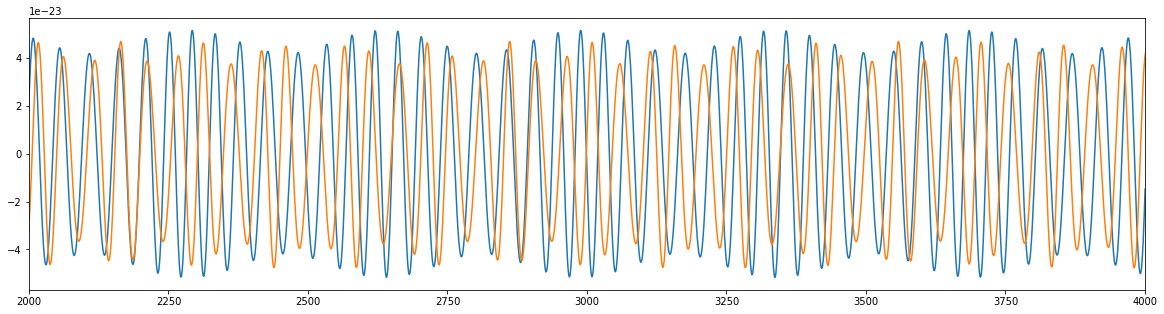

In [158]:
plt.figure(figsize=[20,5])
plt.plot(kerrwave[0],kerrwave[1])
plt.plot(krzwave[0],krzwave[1])
plt.xlim(2000,4000)

In [159]:
getfreq_sec_fromepma(e,p,myM,myspin)

array([ 0.0159368,  0.0604551])

In [160]:
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)

getfreq_sec_frommaxi(t,r,phi,M)

array([ 0.04568301,  0.06407294])

In [162]:
avgomgsec=getfreq_sec_frommaxi(t,r,phi,M)

In [165]:
avgomgr=avgomgsec[0]
avgomgphi=avgomgsec[1]

def fun(x):
    print('called')
    M=x[0]
    spin=x[1]
    print('e=%f, p=%f, M=%f, spin=%f, aimomgr=%f, aimomgphi=%f'%(e,p,M,spin,avgomgr,avgomgphi))

    omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)
    avgomgsec=np.array([avgomgr,avgomgphi])
    omgsec=np.array([omgr,omgphi])
    return (omgsec-avgomgsec)/avgomgsec


from scipy.optimize import root,fsolve
(mymyM,mymyspin)=fsolve(fun,[M,-0.1])

called
e=0.100000, p=6.000000, M=200000.000000, spin=-0.100000, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=200000.000000, spin=-0.100000, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=200000.000000, spin=-0.100000, aimomgr=0.045683, aimomgphi=0.064073


C:\Users\HP\Documents\GitHub\KRZwave\KRZmetric.py:687: RuntimeWarning: invalid value encountered in sqrt
  Tr_=2*Vt/J/np.sqrt(Vr)
D:\ProgramFiles\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\HP\Documents\GitHub\KRZwave\KRZmetric.py:714: RuntimeWarning: invalid value encountered in sqrt
  Dp_=2*Vphi/J/np.sqrt(Vr)


called
e=0.100000, p=6.000000, M=200000.002980, spin=-0.100000, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=200000.000000, spin=-0.100000, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=200000.002980, spin=-0.100000, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=200000.000000, spin=-0.100000, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.045683, aimomgphi=0.064073
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.045683, aimomgphi=0.064073
c

D:\ProgramFiles\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [166]:
mymyspin

-0.10000000000000001

In [185]:
#below: linear test, negative d2
n_spinl=[]
n_Ml=[]

In [236]:

M=2e5
spin=0.4
e=0.1
p=6
d1=0
d3=0
dlist=[]
Mlist=[]
spinlist=[]

for d2 in np.arange(-0.6,0.65,0.1):
    if np.abs(d2-0.0)<1e-10:
        d2=1e-10
        print('zero!')
    filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,e,p,d1,d2,d3)
    index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)

    if np.abs(e-0.0)>1e-8:
        avgomgsec=getfreq_sec_frommaxi(t,r,phi,M)
        print(avgomgsec)
        avgomgr=avgomgsec[0]
        avgomgphi=avgomgsec[1]

        def fun(x):
            print('called')
            M=x[0]
            spin=x[1]
            print('e=%f, p=%f, M=%f, spin=%f, aimomgr=%f, aimomgphi=%f'%(e,p,M,spin,avgomgr,avgomgphi))

            omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)
            avgomgsec=np.array([avgomgr,avgomgphi])
            omgsec=np.array([omgr,omgphi])
            return (omgsec-avgomgsec)/avgomgsec


        from scipy.optimize import root,fsolve
        (myM,myspin)=fsolve(fun,[M,spin])

        getfreq_sec_fromepma(e,p,myM,myspin)
    else:
        avgomgsec=circfreq_sec_fromtrace(t,phi,M)
        def circfun(x):
            spin=x
            omgsec=circfreq_sec_fromrma(p,M,spin)
            print('e=%f, p=%f, M=%f, spin=%.10f, omg=%.10f, aim=%.10f'%(e,p,M,spin,omgsec,avgomgsec))
            return (omgsec-avgomgsec)/avgomgsec
        (myspin)=fsolve(fun,spin)
        myspin=myspin[0]
        myM=M
        circfreq_sec_fromrma(p,myM,myspin)
    dlist.append(d2)
    spinlist.append(myspin)
    Mlist.append(myM)
    for i in range(len(dlist)):
        print([dlist[i],spinlist[i],Mlist[i]])

[ 0.01799933  0.05004751]
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=200000.002980, spin=0.400000, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=252302.636083, spin=0.272332, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=265606.731723, spin=0.256510, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=270304.503766, spin=0.251742, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=270666.922869, spin=0.251468, aimomgr=0.017999, aimomgphi=0.050048
called
e=0.100000, p=6.000000, M=270677.671528, spin=0.251458, aimomgr=0.0

C:\Users\HP\Documents\GitHub\KRZwave\KRZmetric.py:687: RuntimeWarning: invalid value encountered in sqrt
  Tr_=2*Vt/J/np.sqrt(Vr)
D:\ProgramFiles\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\HP\Documents\GitHub\KRZwave\KRZmetric.py:714: RuntimeWarning: invalid value encountered in sqrt
  Dp_=2*Vphi/J/np.sqrt(Vr)


called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.008896, aimomgphi=0.072357
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.008896, aimomgphi=0.072357
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.008896, aimomgphi=0.072357
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.008896, aimomgphi=0.072357
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.008896, aimomgphi=0.072357
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.008896, aimomgphi=0.072357
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.008896, aimomgphi=0.072357


D:\ProgramFiles\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[-0.59999999999999998, 0.25145824180638021, 270677.61941735388]
[-0.5, 0.19807488838691981, 247119.55082522242]
[-0.40000000000000002, 0.13739565171038656, 224785.29543464983]
[-0.30000000000000004, 0.40000000000000002, 200000.0]
[ 0.02038263  0.06827756]
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.020383, aimomgphi=0.068278
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.020383, aimomgphi=0.068278
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.020383, aimomgphi=0.068278
called
e=0.100000, p=6.000000, M=200000.002980, spin=0.400000, aimomgr=0.020383, aimomgphi=0.068278
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.020383, aimomgphi=0.068278
called
e=0.100000, p=6.000000, M=200436.288583, spin=0.108959, aimomgr=0.020383, aimomgphi=0.068278
called
e=0.100000, p=6.000000, M=200705.290176, spin=0.204196, aimomgr=0.020383, aimomgphi=0.068278
called
e=0.100000, p=6.000000, M=200433.8560

[ 0.04199732  0.06506372]
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=200000.002980, spin=0.400000, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=200000.000000, spin=0.400000, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=199372.451684, spin=0.754865, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=198507.843950, spin=0.854229, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=198196.339984, spin=0.884572, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=198176.411132, spin=0.886420, aimomgr=0.041997, aimomgphi=0.065064
called
e=0.100000, p=6.000000, M=198176.143331, spin=0.886445, aimomgr=0.0

C:\Users\HP\Documents\GitHub\KRZwave\KRZmetric.py:342: RuntimeWarning: invalid value encountered in sqrt
  r0 = 1 + sqrt(1 - sqspin);


called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.044244, aimomgphi=0.064704
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.044244, aimomgphi=0.064704
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.044244, aimomgphi=0.064704
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.044244, aimomgphi=0.064704
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.044244, aimomgphi=0.064704
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.044244, aimomgphi=0.064704
called
e=0.100000, p=6.000000, M=nan, spin=nan, aimomgr=0.044244, aimomgphi=0.064704
[-0.59999999999999998, 0.25145824180638021, 270677.61941735388]
[-0.5, 0.19807488838691981, 247119.55082522242]
[-0.40000000000000002, 0.13739565171038656, 224785.29543464983]
[-0.30000000000000004, 0.40000000000000002, 200000.0]
[-0.20000000000000007, 0.17498028567854335, 200305.46132145042]
[-0.10000000000000009, 0.28637990708182659, 200227.23188957386]
[1e-10, 0.40000711328066801, 199999.59299228329

In [237]:
n_spinl.append(spinlist)
n_Ml.append(Mlist)

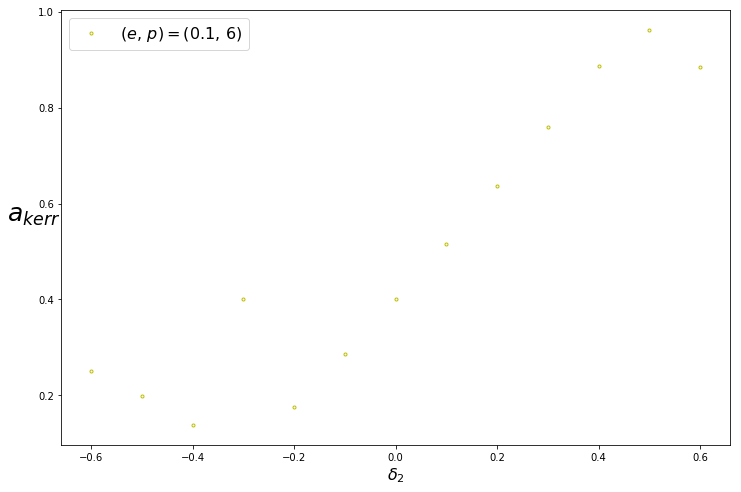

In [238]:
plt.figure(figsize=[12,8])
#plt.plot(np.arange(-0.2,0.6,0.01),1.58*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),2.2*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),2.4*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.2,0.6,0.01),0.9*np.arange(-0.2,0.6,0.01),'b--')
#plt.plot(np.arange(-0.6,0.6,0.01),0.63*np.arange(-0.6,0.6,0.01),'b--')

plt.plot(dlist,(np.array(spinlist)),'y.',markerfacecolor='none',label='$( e,\, p)=( 0.1,\, 6)$')
#plt.plot(dlist,(np.array(Ml[3])-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 6)$')
#plt.text(0.3,-0.2,'$a_0=0.2, \, M_0=2\\times 10^5$',fontsize=20)
plt.xlabel('$\\delta _2$',fontsize=16)
plt.ylabel('${a_{kerr}}$',fontsize=25,rotation=0)
plt.legend(fontsize=16)

In [217]:
Mlist

[254120.95204516369,
 237030.61705815839,
 200000.0,
 200000.0,
 200000.0,
 200998.82502280438,
 200859.49562258707,
 200634.50723986127,
 200345.22132197561,
 199999.73546177123,
 199601.28597257304,
 199150.37213609929,
 198647.33356320337,
 198091.03412362459,
 198647.91207036123,
 200000.0]

In [218]:
e=0.1; p=6; M=2e5; spin=0.6; d1=0; d2=-0.9; d3=0;
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,e,p,d1,d2,d3)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [219]:
getfreq_sec_frommaxi(t,r,phi,M)

array([ 0.01806649,  0.05348412])

In [220]:
myspin=spinlist[0]; myM=Mlist[0]

In [221]:
getfreq_sec_fromepma(0.1,6,myM,myspin)

array([ 0.01806649,  0.05348412])

In [222]:
spin=myspin; M=myM; d2=0
filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\multiple_d\\multiple_d\\trace_M%.0f_spin%.6f_e%.6f_p%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,e,p,d1,d2,d3)
kerrwave=getwave(filenamekerr,np.pi/4,0)

In [223]:
krzwave=getwave(filename,np.pi/4,0)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(8000, 10000)

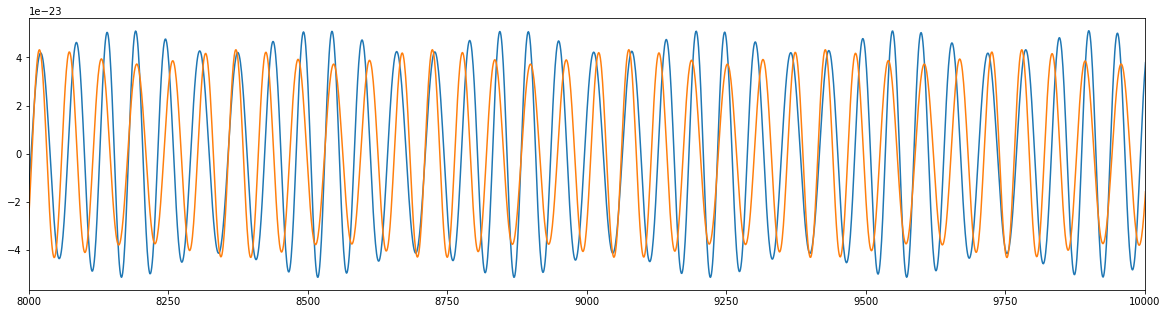

In [233]:
plt.figure(figsize=[20,5])
plt.plot(np.arange(100000),kerrwave[1])
plt.plot(np.arange(100000),krzwave[1])
plt.xlim(8000,10000)

In [227]:
index, tauk,tk,rk,thk,phik,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filenamekerr,unpack=True)

In [228]:
getfreq_sec_frommaxi(tk,rk,phik,myM)

array([ 0.01806655,  0.05348415])

(8000, 10000)

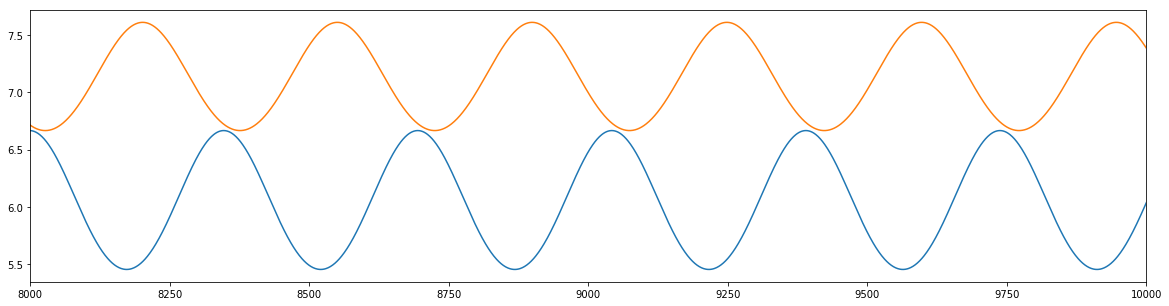

In [234]:
plt.figure(figsize=[20,5])
plt.plot(np.arange(100000),rk)
plt.plot(np.arange(100000),r)
plt.xlim(8000,10000)